In [1]:
#A function to load an image
import cv2
def ImageLoader(address):
    image = cv2.imread(address)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image_gray

In [2]:
#A function to apply fft, fftshift and their inverse on a picture
import numpy as np
def CustomFFT(image):
    image_fft = np.fft.fft2(image)
    image_shft = np.fft.fftshift(image_fft)
    image_ishft = np.fft.ifftshift(image_shft)
    image_ifft = np.fft.ifft2(image_ishft)
    return (image, image_fft, image_shft, image_ishft, image_ifft)

In [ ]:
#Q1A
image = ImageLoader("../Data/images403/image1.jpg")
image_converted = CustomFFT(image)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].imshow(image_converted[0], 'gray')
axs[0].set_title("Original Image")
axs[1].imshow(np.log(1+np.abs(image_converted[1])), 'gray')
axs[1].set_title("Spectrum")
axs[2].imshow(np.log(1+np.abs(image_converted[2])), 'gray')
axs[2].set_title("Centered Spectrum")
axs[3].imshow(np.log(1+np.abs(image_converted[3])), 'gray')
axs[3].set_title("Decentralized Spectrum")
axs[4].imshow(np.log(1+np.abs(image_converted[4])), 'gray')
axs[4].set_title("Inversed Image")

fig.savefig("../PLots/Q1A.png")

In [4]:
def ImagePadder(image, pad_size):
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, 
                                       cv2.BORDER_REPLICATE)
    return padded_image

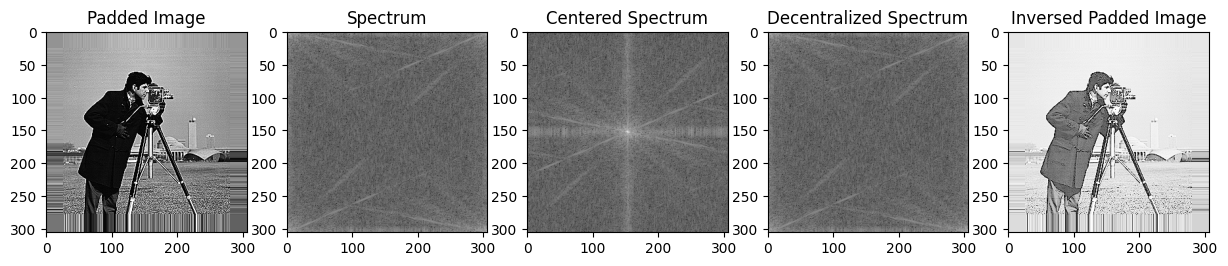

In [5]:
#Q1B
image = ImageLoader("../Data/images403/image1.jpg")
padded_image = ImagePadder(image, 25)
padded_image_converted = CustomFFT(padded_image)

fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].imshow(padded_image_converted[0], 'gray')
axs[0].set_title("Padded Image")
axs[1].imshow(np.log(1+np.abs(padded_image_converted[1])), 'gray')
axs[1].set_title("Spectrum")
axs[2].imshow(np.log(1+np.abs(padded_image_converted[2])), 'gray')
axs[2].set_title("Centered Spectrum")
axs[3].imshow(np.log(1+np.abs(padded_image_converted[3])), 'gray')
axs[3].set_title("Decentralized Spectrum")
axs[4].imshow(np.log(1+np.abs(padded_image_converted[4])), 'gray')
axs[4].set_title("Inversed Padded Image")

fig.savefig("../PLots/Q1B.png")

In [6]:
#A function to calculate ILPF matrix for an image
def ILPF(image):
    height, width = image.shape[:2]
    Filter = np.zeros((height, width), dtype=np.float32)
    cutoff = 50
    for i in range(height):
        for j in range(width):
            tmp = np.sqrt((((i - (height / 2)) ** 2) +
                          (((j - (width / 2)) ** 2))))
            Filter[i, j] = (tmp <= cutoff)
    return Filter

In [7]:
#A function to calculate IHPF matrix for an image
def IHPF(image):
    height, width = image.shape
    Filter = np.zeros((height, width), dtype=np.float32)
    cutoff = 50
    for i in range(height):
        for j in range(width):
            tmp = np.sqrt((((i - (height / 2)) ** 2) +
                          (((j - (width / 2)) ** 2))))
            Filter[i, j] = (tmp > cutoff)
    return Filter

In [8]:
#A function to apply ILPF and IHPF filtering on an image
def Apply_filter(image, Filter):
    image_fft = np.fft.fft2(image)
    image_shft = np.fft.fftshift(image_fft)
    image_filtered = image_shft * Filter
    image_filtered_ishft = np.fft.ifftshift(image_filtered)
    image_filtered_ifft = np.fft.ifft2(image_filtered_ishft)
    return (image, image_shft, image_filtered, image_filtered_ishft, image_filtered_ifft)

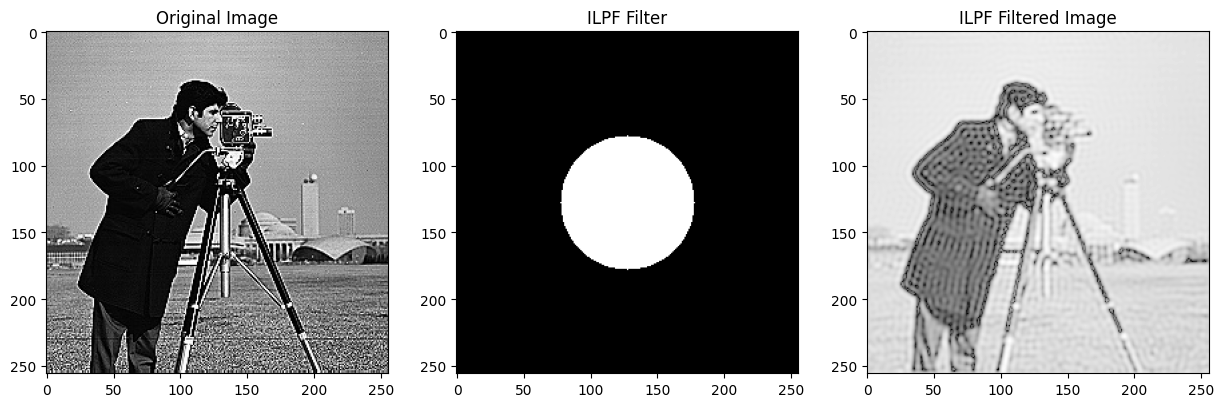

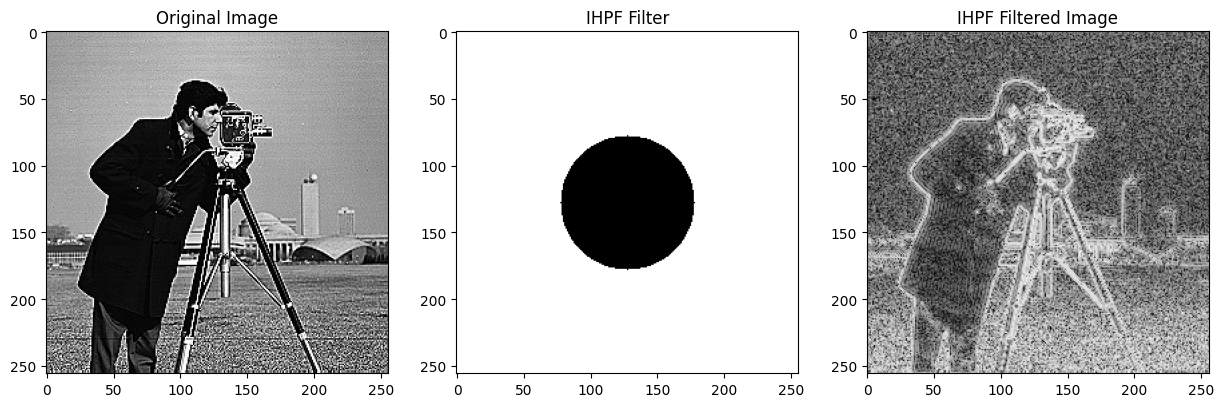

In [9]:
#Q1C
image = ImageLoader("../Data/images403/image1.jpg")
ILPF_filter = ILPF(image)
ILPF_filtered_image = Apply_filter(image, ILPF_filter)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(ILPF_filtered_image[0], 'gray')
axs[0].set_title("Original Image")
axs[1].imshow(ILPF(image), 'gray')
axs[1].set_title("ILPF Filter")
axs[2].imshow(np.log(1+np.abs(ILPF_filtered_image[4])), 'gray')
axs[2].set_title("ILPF Filtered Image")
fig.savefig("../PLots/Q1C1.png")


IHPF_filter = IHPF(image)
IHPF_filtered_image = Apply_filter(image, IHPF_filter)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(IHPF_filtered_image[0], 'gray')
axs[0].set_title("Original Image")
axs[1].imshow(IHPF(image), 'gray')
axs[1].set_title("IHPF Filter")
axs[2].imshow(np.log(1+np.abs(IHPF_filtered_image[4])), 'gray')
axs[2].set_title("IHPF Filtered Image")
fig.savefig("../PLots/Q1C2.png")

In [10]:
#A function to apply gaussian smoothing on an image
def GaussianSmoothing(image, kernel_size):
    smoothed_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return (image, smoothed_image)

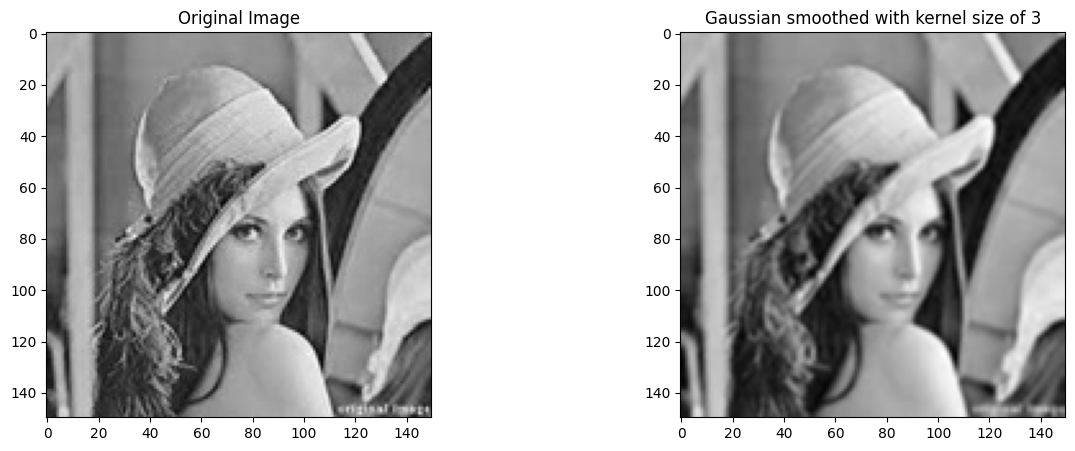

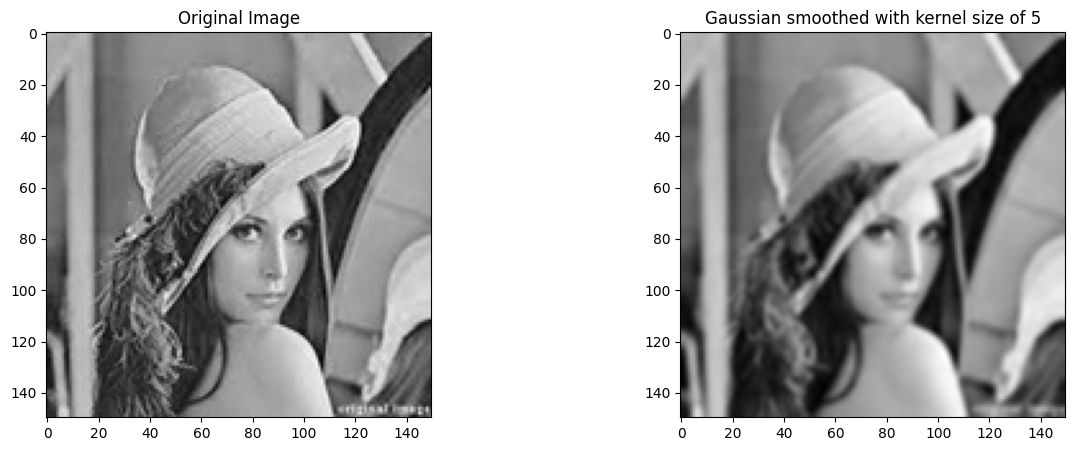

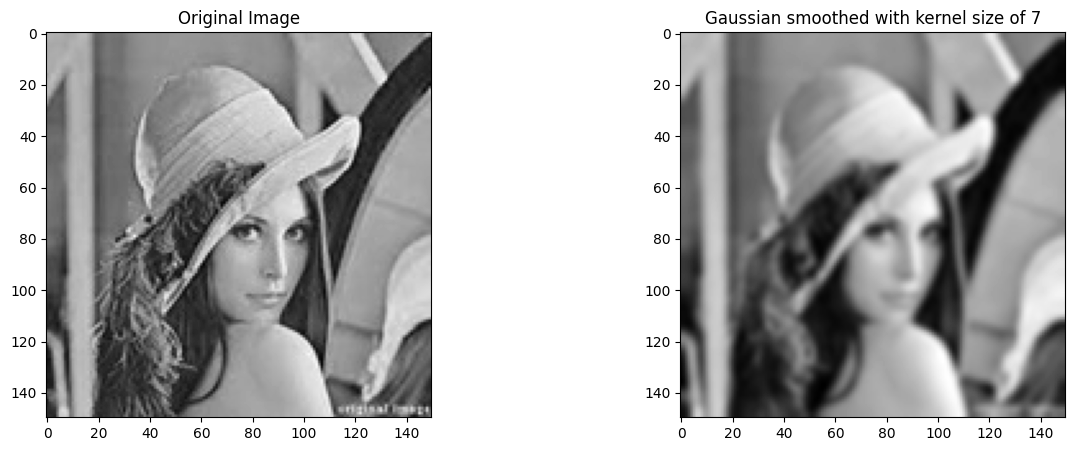

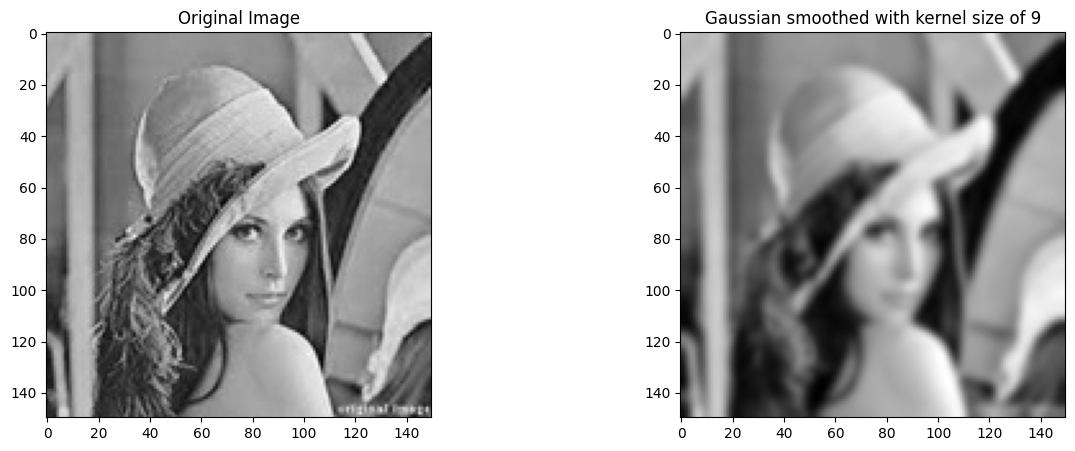

In [11]:
#Q1D
image = ImageLoader("../Data/images403/image2.jpg")

cnt = 1
for i in (3, 5, 7, 9):
    smoothed_image = GaussianSmoothing(image, i)
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(smoothed_image[0], 'gray')
    axs[0].set_title("Original Image")
    axs[1].imshow(smoothed_image[1], 'gray')
    axs[1].set_title("Gaussian smoothed with kernel size of " + str(i))
    fig.savefig("../PLots/Q1D" + str(cnt) + ".png")
    
    cnt += 1

Number of holes: 4
Diameters: [36.83182144165039, 36.730995178222656, 24.166292190551758, 36.935245513916016]


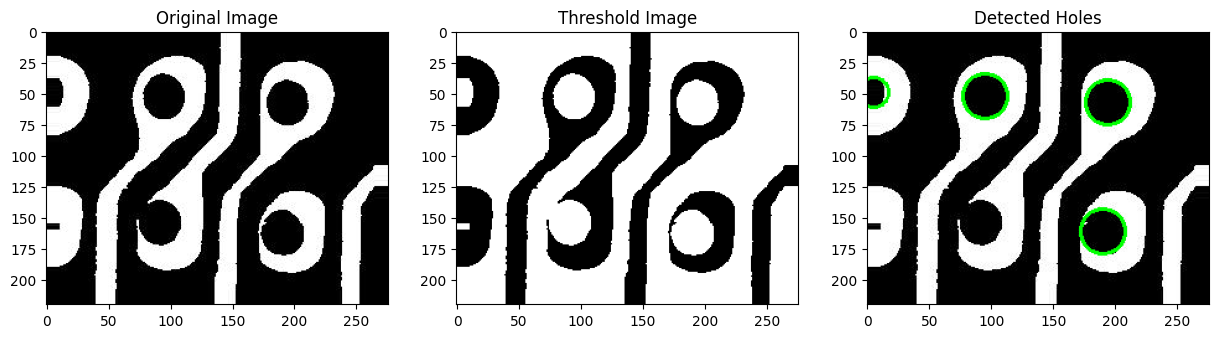

In [12]:
#Method one
def find_holes_and_diameters(image):
    #Preprocessing and finding contors
    image = ImagePadder(image, 10)
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    holes_img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    diameters = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 50 and area < 1300:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            if radius > 5:
                cv2.circle(holes_img, (int(x), int(y)), int(radius), (0, 255, 0), 2)
                diameters.append(2 * radius)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image, 'gray')
    axs[0].set_title("Original Image")
    axs[1].imshow(thresh, 'gray')
    axs[1].set_title('Threshold Image')
    axs[2].imshow(holes_img, 'gray')
    axs[2].set_title('Detected Holes')
    fig.savefig("../PLots/Q2A1.png")

    print(f"Number of holes: {len(diameters)}")
    print(f"Diameters: {diameters}")

image = ImageLoader('../Data/images403/holes.jpg')
find_holes_and_diameters(image)

Number of holes: 4
Diameters: [16.643516540527344, 15.811588287353516, 17.000200271606445, 16.250200271606445]


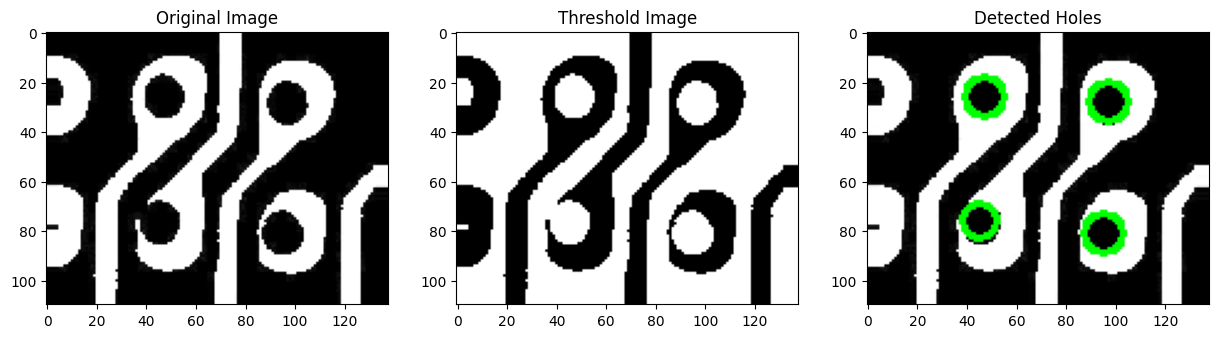

In [13]:
#Method two
def max_pooling(image, kernel_size):
    h, w = image.shape[:2]
    h_pooled = h // kernel_size
    w_pooled = w // kernel_size
    
    if len(image.shape) == 3:
        pooled = np.zeros((h_pooled, w_pooled, image.shape[2]), dtype=image.dtype)
    else:
        pooled = np.zeros((h_pooled, w_pooled), dtype=image.dtype)

    
    for y in range(h_pooled):
        for x in range(w_pooled):
            y_start = y * kernel_size
            x_start = x * kernel_size
            window = image[y_start:y_start+kernel_size, x_start:x_start+kernel_size]
            pooled[y, x] = np.max(window, axis=(0, 1))

    return pooled

def find_holes_and_diameters(image):
    #Preprocessing and finding contors
    image = ImagePadder(image, 10)
    image = max_pooling(image, 2)
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    contours, _ = cv2.findContours(opening, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    holes_img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    diameters = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 50 and area < 200:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            if radius > 5:
                cv2.circle(holes_img, (int(x), int(y)), int(radius), (0, 255, 0), 2)
                diameters.append(2 * radius)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image, 'gray')
    axs[0].set_title("Original Image")
    axs[1].imshow(thresh, 'gray')
    axs[1].set_title('Threshold Image')
    axs[2].imshow(holes_img, 'gray')
    axs[2].set_title('Detected Holes')
    fig.savefig("../PLots/Q2A2.png")

    print(f"Number of holes: {len(diameters)}")
    print(f"Diameters: {diameters}")

image = ImageLoader('../Data/images403/holes.jpg')
find_holes_and_diameters(image)